<a href="https://colab.research.google.com/github/Volkovvpp/BSU_classic_ml/blob/main/healthcare_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
data['Gender'] = data['Gender'].astype('category')
data['Blood Type'] = data['Blood Type'].astype('category')
data['Medical Condition'] = data['Medical Condition'].astype('category')
data['Insurance Provider'] = data['Insurance Provider'].astype('category')
data['Admission Type'] = data['Admission Type'].astype('category')
data['Medication'] = data['Medication'].astype('category')
data['Test Results'] = data['Test Results'].astype('category')

## Change the date columns
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  category      
 3   Blood Type          55500 non-null  category      
 4   Medical Condition   55500 non-null  category      
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  category      
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  category      
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  category  

In [ ]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
data.duplicated().sum()

534

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Male,27496
Female,27470


In [ ]:
data['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [ ]:
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [ ]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [ ]:
data['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

In [ ]:
data['Hospital'].value_counts()

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64

In [ ]:
data['Admission Type'].value_counts()

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64

In [ ]:
data['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [ ]:
# Drop colums
data = data.drop(columns=['Doctor'])
data = data.drop(columns=['Hospital'])
data = data.drop(columns=['Room Number'])

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


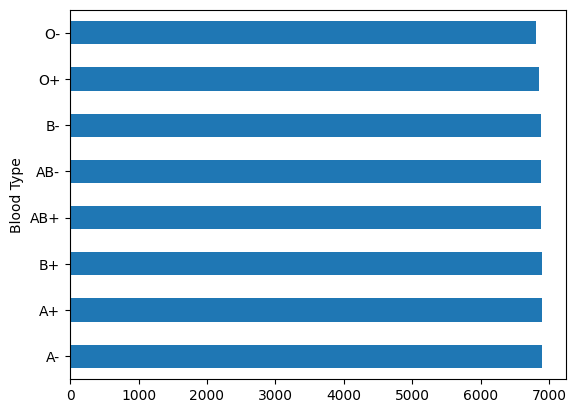

In [ ]:
fig = data['Blood Type'].value_counts().plot.barh()

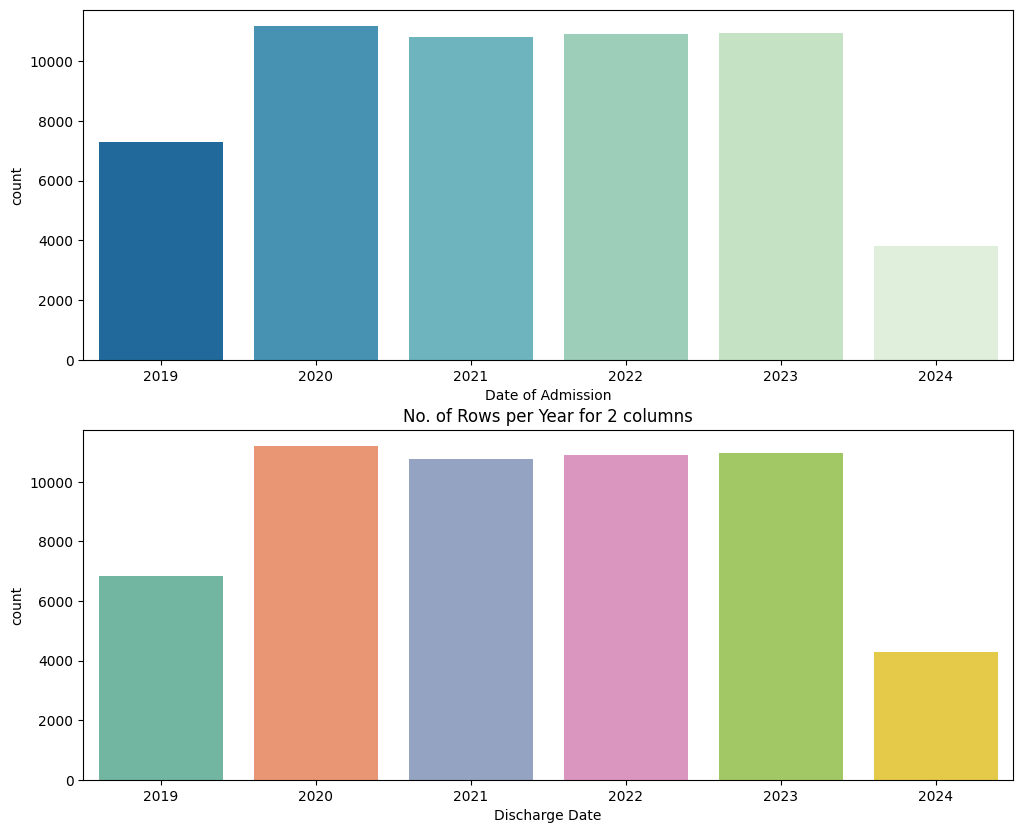

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
plt.title('No. of Rows per Year for 2 columns')
sns.countplot(x=pd.to_datetime(data['Date of Admission']).dt.year, ax=ax[0], palette='GnBu_r')
sns.countplot(x=pd.to_datetime(data['Discharge Date']).dt.year, ax=ax[1], palette='Set2')
fig.show()

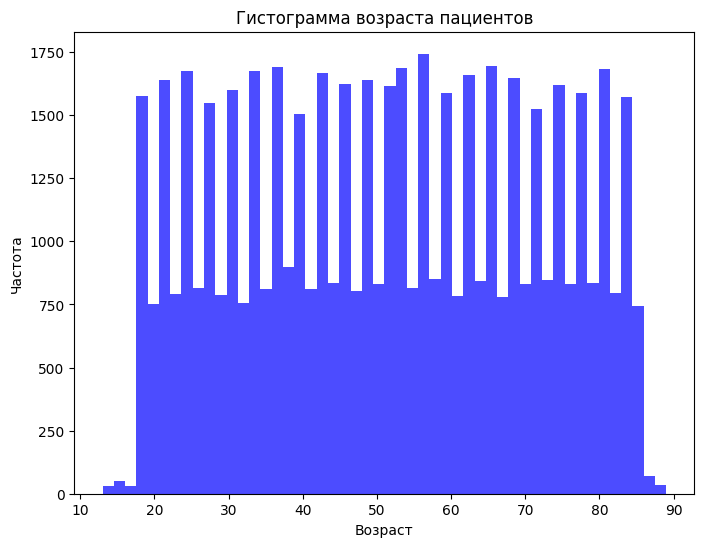

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Age'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Гистограмма возраста пациентов')
plt.show()

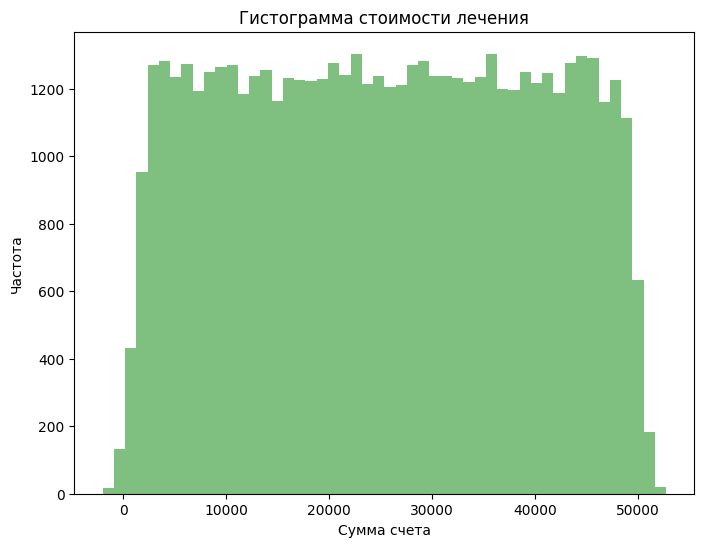

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(data['Billing Amount'], bins=50, color='green', alpha=0.5)
plt.xlabel('Сумма счета')
plt.ylabel('Частота')
plt.title('Гистограмма стоимости лечения')
plt.show()

In [ ]:
data['Admitted_for_days'] = (data['Discharge Date'] - data['Date of Admission'])
data.sample(10)

In [ ]:
data['Admitted_for_days'] = data['Admitted_for_days'].astype(str)
data['Admitted_for_days'] = data['Admitted_for_days'].str.replace(' days', '').astype(np.int8)

In [ ]:
data['admission_year'] = pd.to_datetime(data['Date of Admission']).dt.year
data['admission_month'] = pd.to_datetime(data['Date of Admission']).dt.month

# changing data type to integer for data processing
data['admission_year'] = data['admission_year'].astype(np.int8)
data['admission_year'] = abs(data['admission_year'])
data['admission_month'] = data['admission_month'].astype(np.int8)

data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admitted_for_days,admission_year,admission_month
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2,24,1
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,29,8
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15,26,9
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30,28,11
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20,26,9


In [ ]:
fig = px.scatter(data_frame=data, x='Admitted_for_days', y='Billing Amount')
fig.show()

In [ ]:
data.drop(columns=['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date'], inplace=True)

In [ ]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Admitted_for_days,admission_year,admission_month
0,30,Male,B-,Cancer,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2,24,1
1,62,Male,A+,Obesity,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6,29,8
2,76,Female,A-,Obesity,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15,26,9
3,28,Female,O+,Diabetes,Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30,28,11
4,43,Female,AB+,Cancer,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20,26,9


In [ ]:
data['Gender'] = data['Gender'].map({ 'Male': 0, 'Female': 1 }).astype(np.int8)

data['Blood Type'] = data['Blood Type'].map({ 'A-': 0, 'A+': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7 }).astype(np.int8)

data['Medical Condition'] = data['Medical Condition'].map({ 'Arthritis': 0, 'Diabetes': 1, 'Hypertension': 2, 'Obesity': 3, 'Cancer': 4, 'Asthma': 5 }).astype(np.int8)

data['Admission Type'] = data['Admission Type'].map({ 'Elective': -1,  'Urgent': 0, 'Emergency': 1 }).astype(np.int8)

data['Medication'] = data['Medication'].map({ 'Lipitor': 0, 'Ibuprofen': 1, 'Aspirin': 2, 'Paracetamol': 3, 'Penicillin': 4 }).astype(np.int8)

data['Test Results'] = data['Test Results'].map({ 'Abnormal': 1, 'Normal': 0, 'Inconclusive': -1 }).astype(np.int8)

data['Insurance Provider'] = data['Insurance Provider'].map({ 'Cigna': 0, 'Medicare': 1, 'UnitedHealthcare': 2, 'Blue Cross': 3, 'Aetna': 4 }).astype(np.int8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 54966 non-null  int64  
 1   Gender              54966 non-null  int8   
 2   Blood Type          54966 non-null  int8   
 3   Medical Condition   54966 non-null  int8   
 4   Insurance Provider  54966 non-null  int8   
 5   Billing Amount      54966 non-null  float64
 6   Admission Type      54966 non-null  int8   
 7   Medication          54966 non-null  int8   
 8   Test Results        54966 non-null  int64  
 9   Admitted_for_days   54966 non-null  int8   
 10  admission_year      54966 non-null  int8   
 11  admission_month     54966 non-null  int8   
dtypes: float64(1), int64(2), int8(9)
memory usage: 2.1 MB


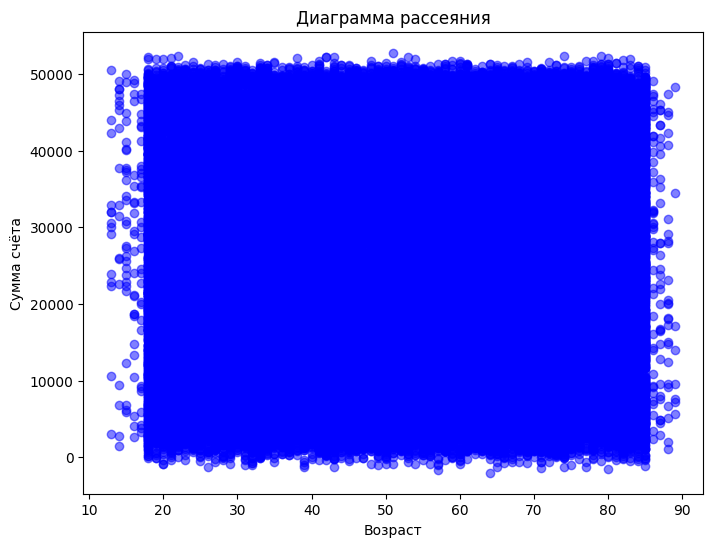

In [ ]:
# Диаграмма рассеяния: возраст и сумма счёта
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Billing Amount'], color='blue', alpha=0.5)
plt.title('Диаграмма рассеяния')
plt.xlabel('Возраст')
plt.ylabel('Сумма счёта')
plt.show()

In [ ]:
data = data.drop(columns=['Room Number'])
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admitted_for_days,admission_year,admission_month
0,30,0,5,4,3,18856.281306,0,3,1,2,24,1
1,62,0,1,3,1,33643.327287,1,1,0,6,29,8
2,76,1,0,3,4,27955.096079,1,2,1,15,26,9
3,28,1,6,1,1,37909.782410,-1,1,2,30,28,11
4,43,1,2,4,4,14238.317814,0,4,2,20,26,9


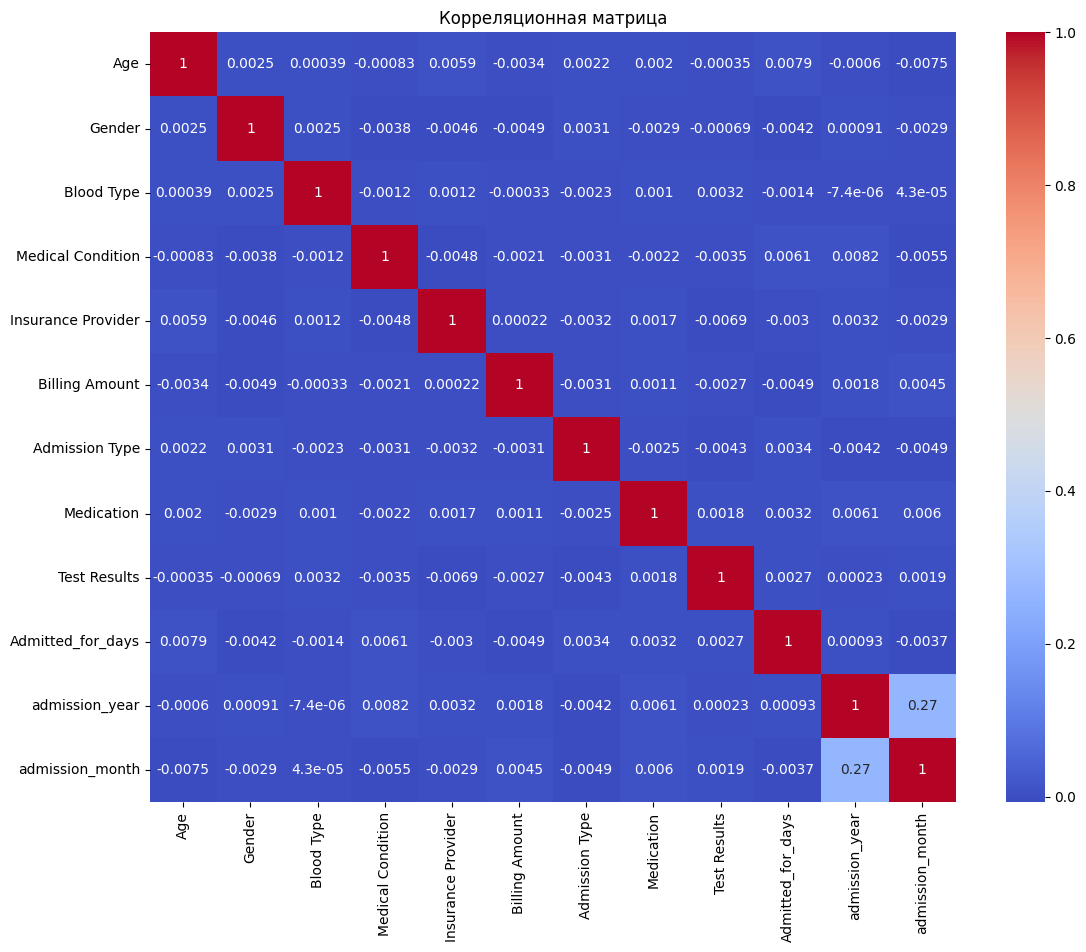

In [ ]:
# Матрица корреляций для числовых данных
corr_matrix = data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(13,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

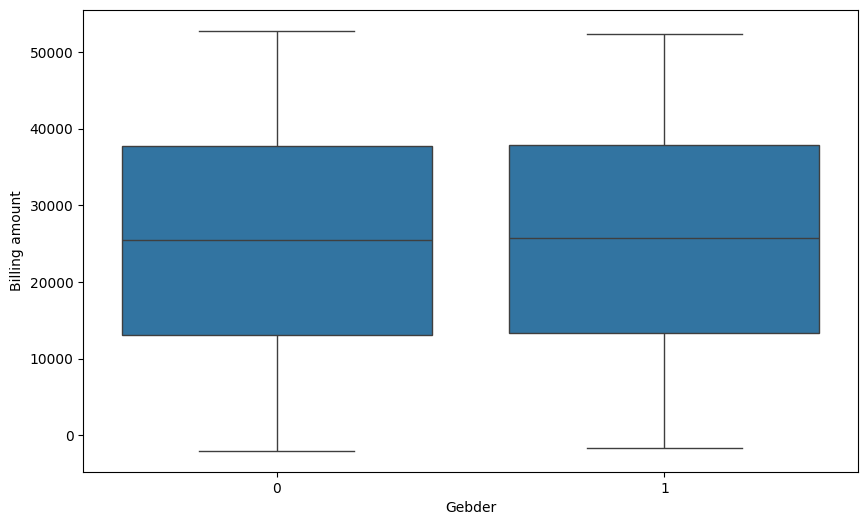

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.xlabel('Gebder')
plt.ylabel('Billing amount')
plt.show()

In [ ]:
le = LabelEncoder()
data['Test Results'] = le.fit_transform(data['Test Results'])

In [ ]:
train = data.drop(columns='Test Results', axis=1).copy()
target = data['Test Results'].copy()

In [ ]:
numeric_columns = list(train.select_dtypes(np.number).columns)
# Normalize the data
train[numeric_columns] = StandardScaler().fit_transform(train[numeric_columns])

## Select categorical columns
cat_cols = train.select_dtypes('category').columns.tolist()
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))
train[encoded_cols] = encoder.transform(train[cat_cols])

## CONVERT DATA TO categorical to numerical ONEHOT ENCODER

train = train[numeric_columns + encoded_cols]
train.head()

,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Admitted_for_days,admission_year,admission_month,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,-1.098427,-0.999527,0.658607,0.882797,-0.470713,0.233250,0.008275,0.709862,-1.558559,-1.778715,-1.608189,0.0,1.0,0.0,0.0,0.0
1,0.533770,-0.999527,-1.088334,0.297277,0.570021,-0.313520,1.234216,-0.704151,-1.096739,1.560339,0.427969,0.0,0.0,0.0,1.0,0.0
2,1.247856,1.000473,-1.525069,0.297277,0.169675,-0.834253,1.234216,0.002856,-0.057646,-0.443093,0.718848,1.0,0.0,0.0,0.0,0.0
3,-1.200439,1.000473,1.095342,-0.873764,0.870301,1.292075,-1.217667,-0.704151,1.674178,0.892528,1.300608,0.0,0.0,0.0,1.0,0.0
4,-0.435347,1.000473,-0.651599,0.882797,-0.795732,1.361506,0.008275,1.416869,0.519629,-0.443093,0.718848,1.0,0.0,0.0,0.0,0.0
